# Rudarenje podataka - seminarski rad
- <font color=white>Database</font>: __[Link to database](https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min)__
<br>
- <font color=white>Student</font>: **Dominik Knez**
<br>
- <font color=white>JMBAG</font>: **0035227317**

<img src="https://www.enostech.com/wp-content/uploads/2022/05/legends-map.jpg" alt="Drawing" style="width: 932px; height: 620px;"/>

### Opis skupa podataka

- <font color=white>Broj redaka</font>: 9879 
<br>
- <font color=white>Broj atributa (stupaca)</font>: 40 
<br>
- <font color=red>Predviđanje vrijednosti</font></font>: koji tim pobjeđuje (<font color=red>blueWins</font></font>: 0/1)
<br>
- <font color=white>Opis atributa (redom)</font>:

|Index|Naziv|Opis|
|:---|:---|:---
|1|gameId|ID from played match|
|2|blueWins|Blue team wins or not|
|3|blueWardsPlaced|Number of wards placed from blue team|
|4|blueWardsDestroyed|Number of wards destroyed from blue team|
|5|blueFirstBlood|Blue team gets first kill or not|
|6|blueKills|Number of kills by blue team|
|7|blueDeaths|Number of deaths by blue team|
|8|blueAssists|Number of assists by blue team|
|9|blueEliteMonsters|Number of elite monsters killed by blue team|
|10|blueDragons|Number of dragons killed by blue team|
|11|blueHeralds|Number of heralds killed by blue team|
|12|blueTowersDestroyed|Number of towers destroyed by blue team|
|13|blueTotalGold|Total gold from blue team|
|14|blueAvgLevel|Average level of blue team|
|15|blueTotalExperience|Total experience from blue team|
|16|blueTotalMinionsKilled|Number of minions killed by blue team|
|17|blueTotalJungleMinionsKilled|Number of jungle minions killed by blue team|
|18|blueGoldDiff|Gold difference between blue and red team|
|19|blueExperienceDiff|Experience difference between blue and red team|
|20|blueCSPerMin|Number of all minions killed by blue team in 1 minute|
|22|blueGoldPerMin|Total gold earned by blue team in 1 minute|
|23|redWardsPlaced|Number of wards placed from red team|
|24|redWardsDestroyed|Number of wards destroyed from red team|
|25|redFirstBlood|Red team gets first kill or not|
|26|redKills|Number of kills by red team|
|27|redDeaths|Number of deaths by red team|
|28|redAssists|Number of assists by red team|
|29|redEliteMonsters|Number of elite monsters killed by red team|
|30|redDragons|Number of dragons killed by red team|
|31|redHeralds|Number of heralds killed by red team|
|32|redTowersDestroyed|Number of towers destroyed by red team|
|33|redTotalGold|Total gold from red team|
|34|redAvgLevel|Average level of red team|
|35|redTotalExperience|Total experience from red team|
|36|redTotalMinionsKilled|Number of minions killed by red team|
|37|redTotalJungleMinionsKilled|Number of jungle minions killed by red team|
|38|redGoldDiff|Gold difference between red and blue team|
|39|redExperienceDiff|Experience difference between red and blue team|
|40|redCSPerMin|Number of all minions killed by red team in 1 minute|
|41|redGoldPerMin|Total gold earned by red team in 1 minute|

<br>
<br>
<img src="https://pa1.aminoapps.com/5776/e02dfe8a0bfc23335694d1658889d35acb9b951d_hq.gif">
<p><strong>GIF kako funkcionira ward</strong></p>

<br>

<img src="https://gamingonsteroids.com/loader_files/gifs/lasthit.gif">
<p><strong>GIF što su minioni</strong></p>




### Učitavanje potrebnih knjižica

In [52]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from matplotlib.lines import Line2D
from sklearn.neighbors import KNeighborsClassifier

### Učitavanje skupa podataka

In [53]:
url = "high_diamond_ranked_10min.csv"
dataset = pd.read_csv(url, delim_whitespace=False)

### Pregled skupa podataka

In [54]:
dataset

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


### Stupci skupa podataka (atributi)

In [55]:
print("Svi stupci skupa podataka:")
dataset.columns

Svi stupci skupa podataka:


Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

### Tipovi podataka svakog stupca

In [56]:
print("Tipovi podataka za svaki atribut:")
dataset.dtypes

Tipovi podataka za svaki atribut:


gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64


### Pregled postoje li nedostajeće vrijednosti


In [57]:
print("Nedostajuće vrijednosti:")
print("")
print(dataset.isnull().sum())

Nedostajuće vrijednosti:

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons            

### Statistika skupa podataka
- <font color=white>srednja vrijednost</font>
<br>
- <font color=white>standardna devijacija</font>
<br>
- <font color=white>minimalna vrijednost</font>
<br>
- <font color=white>medijan</font>
<br>
- <font color=white>maksimalna vrijednost</font>
<br>

In [58]:
columns_to_exclude = ['gameId', 'blueWins','blueFirstBlood','redFirstBlood']
dataset.drop(columns=columns_to_exclude).describe()

,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,22.288288,2.824881,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,18.019177,2.174998,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,14.000000,1.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,16.000000,3.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,20.000000,4.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,250.000000,27.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


## Vizualizacija podataka

##### Graf za stupac blueGoldDiff

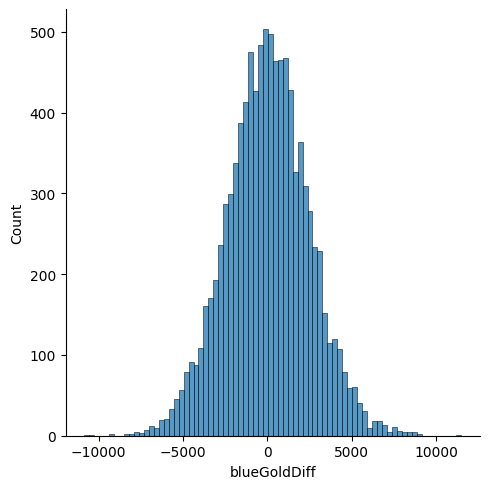

In [59]:
sns.displot(dataset["blueGoldDiff"])
plt.show()

##### Box plot grafovi za stupce:
- <font color=white>blueWardsPlaced</font>
<br>
- <font color=white>blueWardsDestroyed</font>
<br>
- <font color=white>redWardsPlaced</font>
<br>
- <font color=white>redWardsDestroyed</font>
<br>

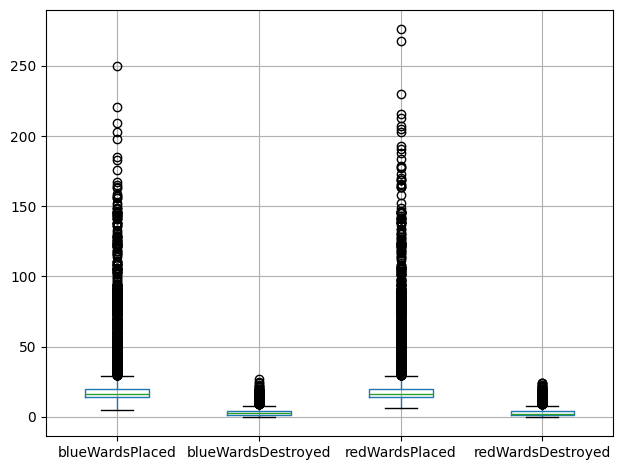

In [60]:
dataset[["blueWardsPlaced","blueWardsDestroyed","redWardsPlaced","redWardsDestroyed"]].boxplot()
plt.tight_layout()
plt.show()

##### Box plot grafovi za stupce:
- <font color=white>blueKills</font>
<br>
- <font color=white>redKills</font>
<br>

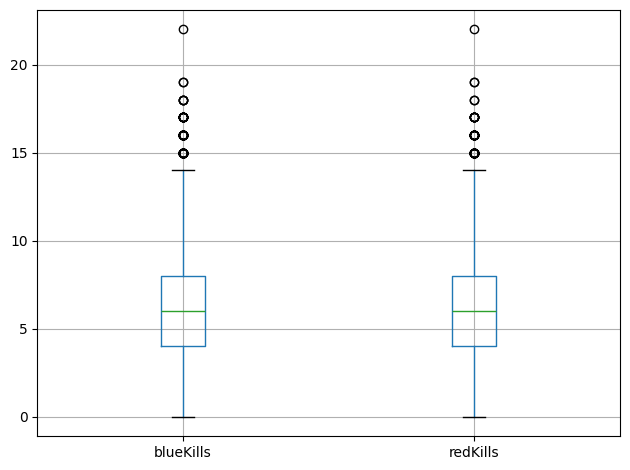

In [61]:
dataset[["blueKills","redKills"]].boxplot()
plt.tight_layout()
plt.show()

#### Entropija 

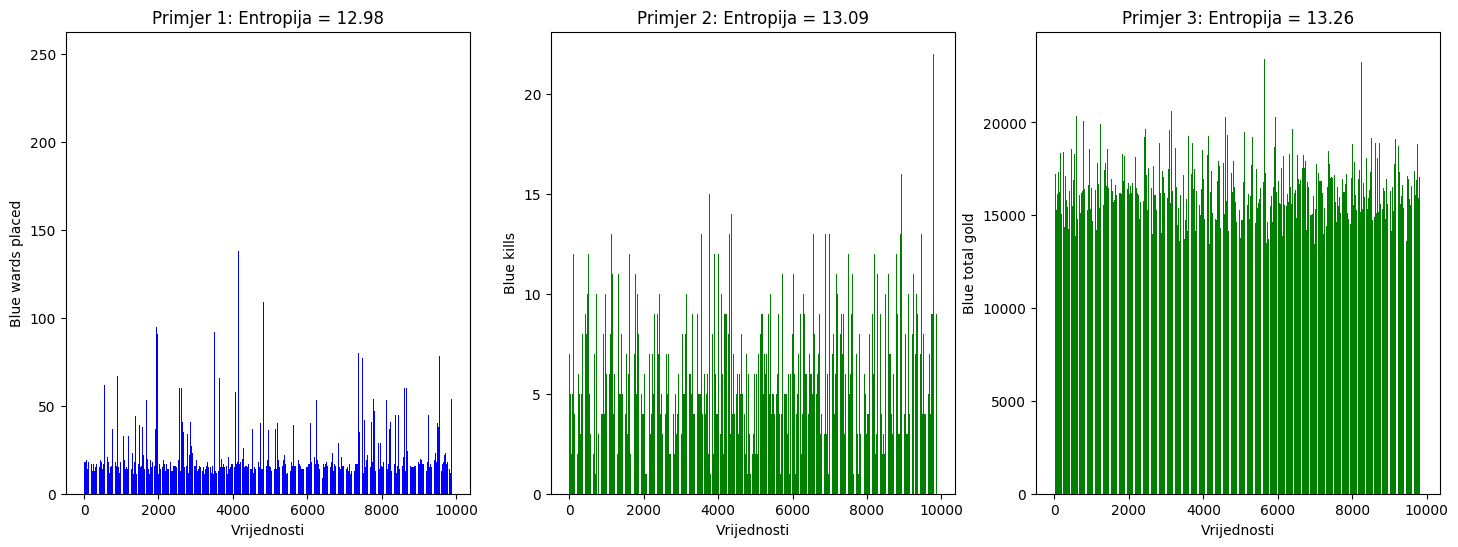

In [72]:
# Izračun entropije za svaki primjer
entropy1 = entropy(dataset["blueWardsPlaced"], base=2)
entropy2 = entropy(dataset["blueKills"], base=2)
entropy3 = entropy(dataset["blueTotalGold"], base=2)

# Vizualizacija rezultata
plt.figure(figsize=(24, 6))

plt.subplot(141)
plt.bar(range(len(dataset["blueWardsPlaced"])), dataset["blueWardsPlaced"], color='blue')
plt.xlabel('Vrijednosti')
plt.ylabel('Blue wards placed')
plt.title(f'Primjer 1: Entropija = {entropy1:.2f}')


plt.subplot(142)
plt.bar(range(len(dataset["blueKills"])), dataset["blueKills"], color='green')
plt.xlabel('Vrijednosti')
plt.ylabel('Blue kills')
plt.title(f'Primjer 2: Entropija = {entropy2:.2f}')

plt.subplot(143)
plt.bar(range(len(dataset["blueTotalGold"])), dataset["blueTotalGold"], color='green')
plt.xlabel('Vrijednosti')
plt.ylabel('Blue total gold')
plt.title(f'Primjer 3: Entropija = {entropy3:.2f}')

plt.show()

#### Korelacija:

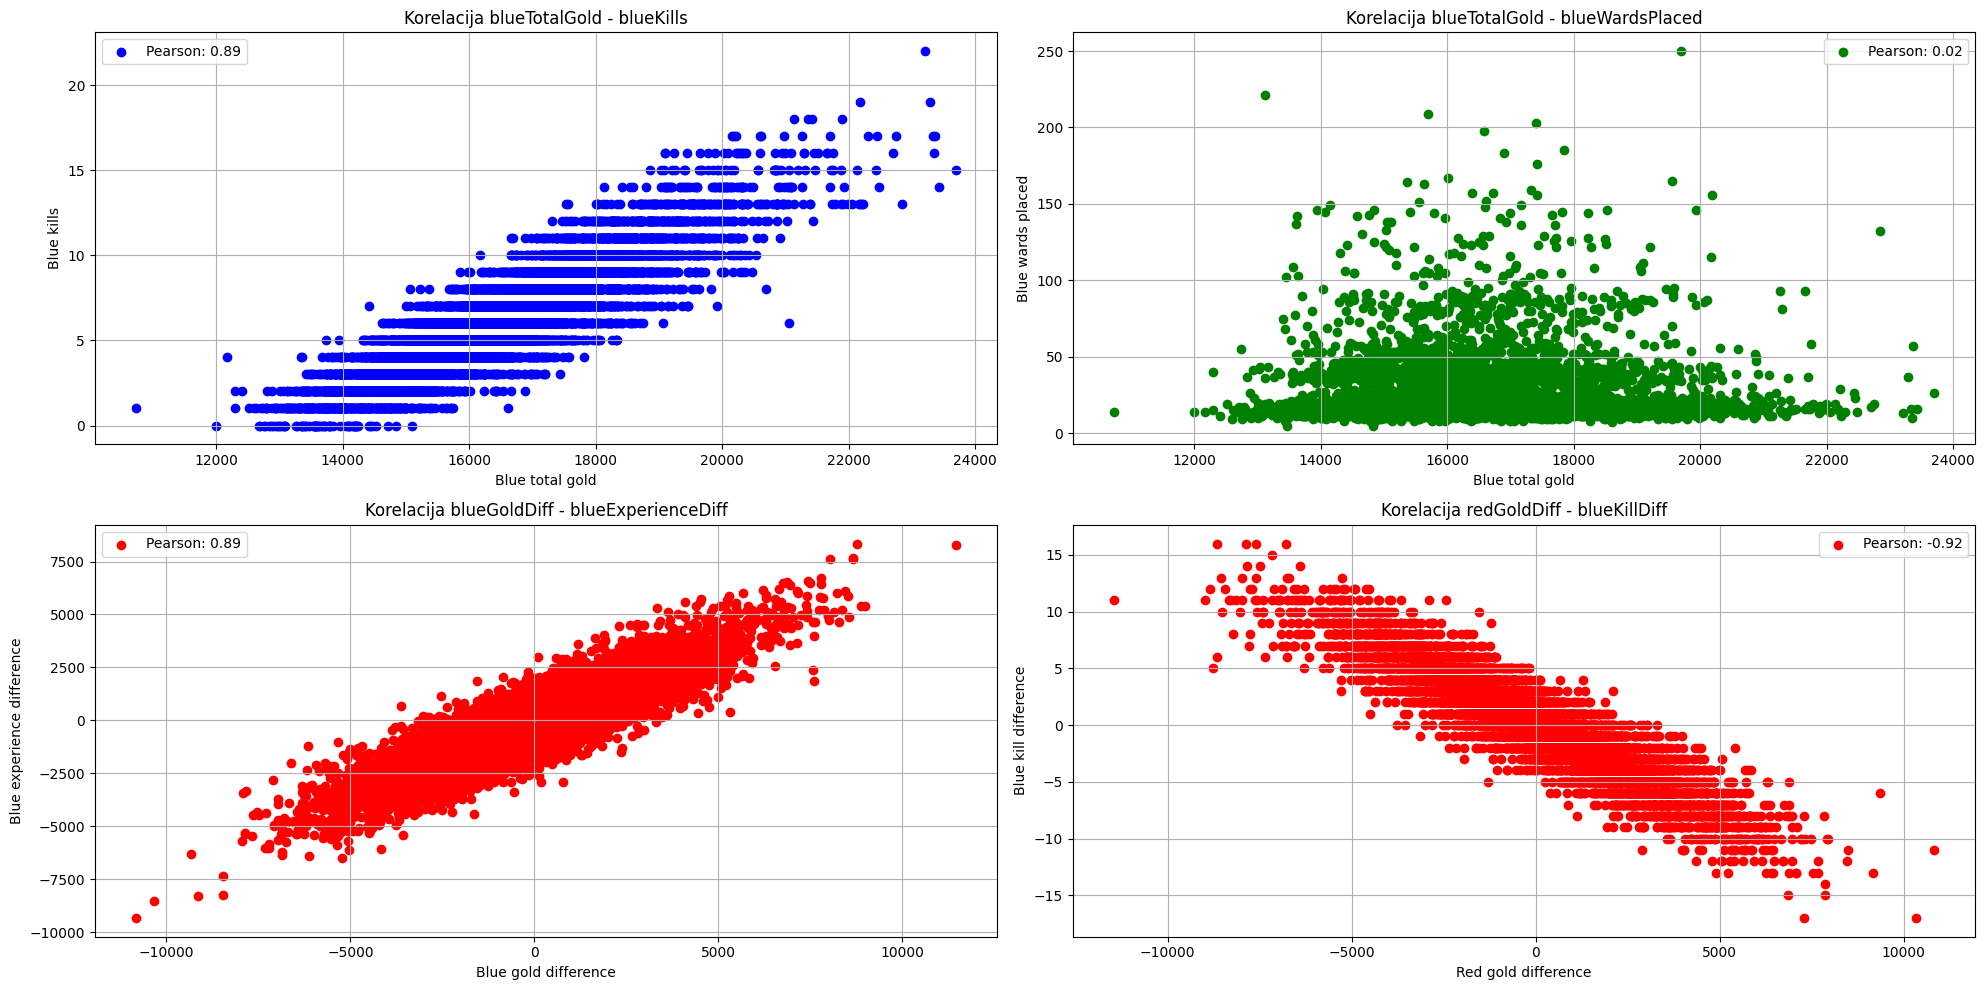

In [63]:

# Izračun Pearsonovog koeficijenta korelacije za svaki primjer
corr1 = np.corrcoef(dataset["blueTotalGold"], dataset["blueKills"])[0, 1]
corr2 = np.corrcoef(dataset["blueTotalGold"], dataset["blueWardsPlaced"])[0, 1]
corr3 = np.corrcoef(dataset["blueGoldDiff"], dataset["blueExperienceDiff"])[0, 1]
corr4 = np.corrcoef(dataset["redGoldDiff"], dataset["blueKills"] - dataset["redKills"])[0, 1]

# Vizualizacija rezultata
plt.figure(figsize=(20, 10))

plt.subplot(221)
plt.scatter(dataset["blueTotalGold"], dataset["blueKills"], c='blue', label=f'Pearson: {corr1:.2f}')
plt.ylabel('Blue kills')
plt.xlabel('Blue total gold')
plt.title('Korelacija blueTotalGold - blueKills')
plt.legend()
plt.grid(True)

plt.subplot(222)
plt.scatter(dataset["blueTotalGold"], dataset["blueWardsPlaced"], c='green', label=f'Pearson: {corr2:.2f}')
plt.ylabel('Blue wards placed')
plt.xlabel('Blue total gold')
plt.title('Korelacija blueTotalGold - blueWardsPlaced')
plt.legend()
plt.grid(True)

plt.subplot(223)
plt.scatter(dataset["blueGoldDiff"], dataset["blueExperienceDiff"], c='red', label=f'Pearson: {corr3:.2f}')
plt.xlabel('Blue gold difference')
plt.ylabel('Blue experience difference')
plt.title('Korelacija blueGoldDiff - blueExperienceDiff')
plt.legend()
plt.grid(True)

plt.subplot(224)
plt.scatter(dataset["redGoldDiff"], dataset["blueKills"] - dataset["redKills"], c='red', label=f'Pearson: {corr4:.2f}')
plt.xlabel('Red gold difference')
plt.ylabel('Blue kill difference')
plt.title('Korelacija redGoldDiff - blueKillDiff')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

##### Graf za stupce blueGoldDiff - blueWins

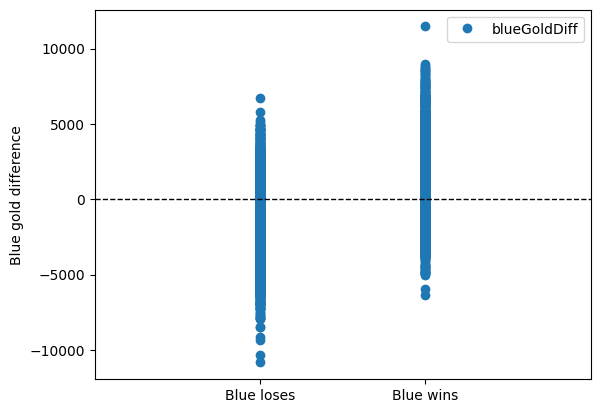

In [64]:
dataset.plot(x="blueWins",y="blueGoldDiff",style="o")
plt.ylabel("Blue gold difference")
plt.xlabel("")
plt.xticks([0, 1],['Blue loses', 'Blue wins'])
plt.margins(x=1)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.show()

### Klasifikacijaska stabla odlučivanja

Accuracy score:
0.638663967611336

Classification report:
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      2031
           1       0.62      0.64      0.63      1921

    accuracy                           0.64      3952
   macro avg       0.64      0.64      0.64      3952
weighted avg       0.64      0.64      0.64      3952


Confusion matrix:
[[1288  743]
 [ 685 1236]]


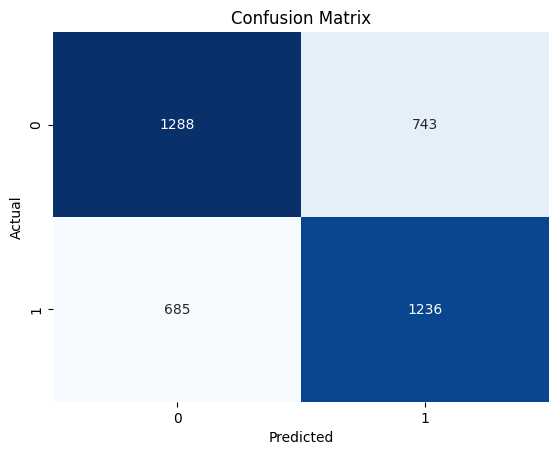

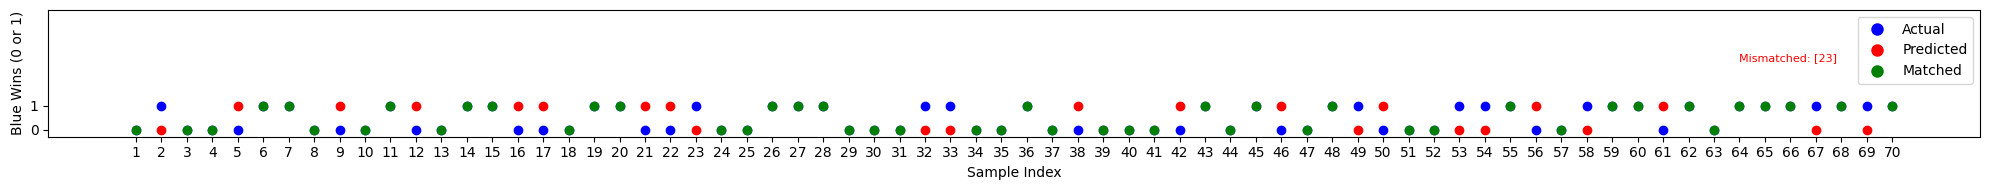

Accuracy score:
0.667004048582996

Classification report:
              precision    recall  f1-score   support

           0       0.69      0.64      0.66      2031
           1       0.65      0.70      0.67      1921

    accuracy                           0.67      3952
   macro avg       0.67      0.67      0.67      3952
weighted avg       0.67      0.67      0.67      3952


Confusion matrix:
[[1292  739]
 [ 577 1344]]


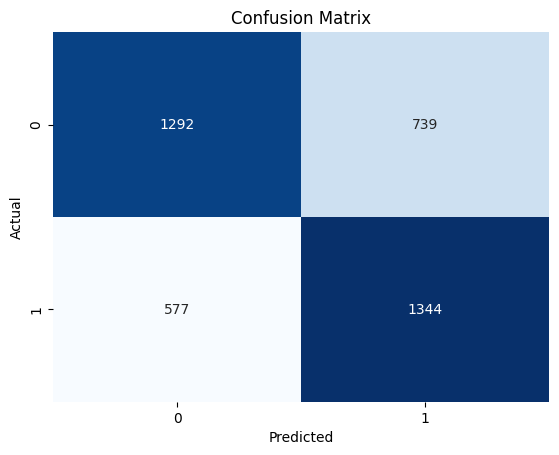

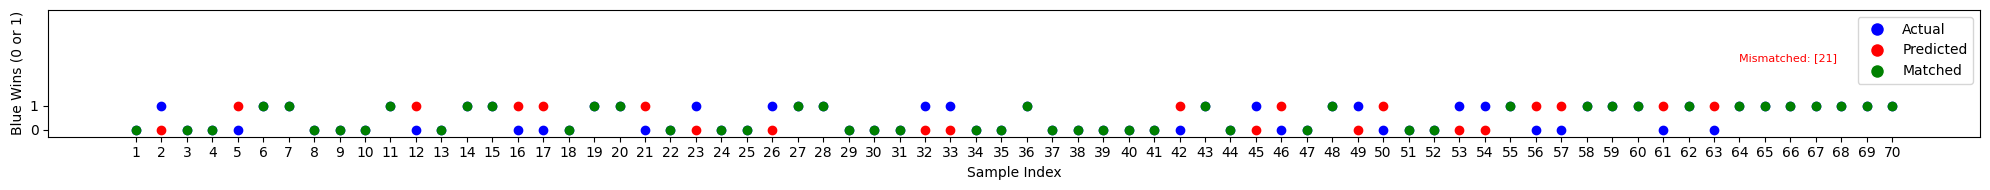

In [79]:
x = dataset.drop(["blueWins", "gameId"], axis=1)
y = dataset["blueWins"].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

acc_DTC_default=accuracy_score(y_test, y_pred)

print("Accuracy score:")
print(accuracy_score(y_test, y_pred))
print("")

print("Classification report:")
print(classification_report(y_test, y_pred))
print("")

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(20, 2))

# Number of samples to plot
num_samples = 70

# Plotting the actual outcomes
plt.scatter(range(1, num_samples + 1), y_test[:num_samples], color='blue', label='Actual')

# Count the number of mismatched samples
num_mismatched = sum(y_pred[i] != y_test[i] for i in range(num_samples))

# Plotting the predicted outcomes and adding text box for mismatched count
for i in range(num_samples):
    # Check if predicted and actual outcomes are the same
    if y_pred[i] == y_test[i]:
        k=0
        color = 'green'  # Use green if predicted and actual are the same
        label = 'Matched' if i == 0 else ''  # Show "Matched" only for the first matched point
    else:
        color = 'red'  # Use red if predicted and actual are different
        label = 'Predicted' if i == 0 else ''  # Show "Predicted" only for the first predicted point

    plt.scatter(i + 1, y_pred[i], color=color)

# Create a separate legend with labels for "Predicted" and "Matched"
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Actual'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Predicted'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Matched'),
]

# Add custom legend entries to the legend
plt.legend(handles=legend_elements)

# Add text box for mismatched count
plt.text(64, 3, f'Mismatched: {num_mismatched}', color='red', ha='left', va='center', fontsize=8)

plt.yticks([0, 1])
plt.ylim(-0.3, 5)

plt.xlabel('Sample Index')
plt.ylabel('Blue Wins (0 or 1)')
plt.xticks(range(1, num_samples + 1))  # Set ticks for the x-axis
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

x = dataset.drop(["blueWins", "gameId"], axis=1)
y = dataset["blueWins"].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

classifier = DecisionTreeClassifier(criterion='gini', max_depth=10)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

acc_DTC_gini=accuracy_score(y_test, y_pred)

print("Accuracy score:")
print(accuracy_score(y_test, y_pred))
print("")

print("Classification report:")
print(classification_report(y_test, y_pred))
print("")

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(20, 2))

# Number of samples to plot
num_samples = 70

# Plotting the actual outcomes
plt.scatter(range(1, num_samples + 1), y_test[:num_samples], color='blue', label='Actual')

# Count the number of mismatched samples
num_mismatched = sum(y_pred[i] != y_test[i] for i in range(num_samples))

# Plotting the predicted outcomes and adding text box for mismatched count
for i in range(num_samples):
    # Check if predicted and actual outcomes are the same
    if y_pred[i] == y_test[i]:
        k=0
        color = 'green'  # Use green if predicted and actual are the same
        label = 'Matched' if i == 0 else ''  # Show "Matched" only for the first matched point
    else:
        color = 'red'  # Use red if predicted and actual are different
        label = 'Predicted' if i == 0 else ''  # Show "Predicted" only for the first predicted point

    plt.scatter(i + 1, y_pred[i], color=color)

# Create a separate legend with labels for "Predicted" and "Matched"
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Actual'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Predicted'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Matched'),
]

# Add custom legend entries to the legend
plt.legend(handles=legend_elements)

# Add text box for mismatched count
plt.text(64, 3, f'Mismatched: {num_mismatched}', color='red', ha='left', va='center', fontsize=8)

plt.yticks([0, 1])
plt.ylim(-0.3, 5)

plt.xlabel('Sample Index')
plt.ylabel('Blue Wins (0 or 1)')
plt.xticks(range(1, num_samples + 1))  # Set ticks for the x-axis
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


### Klasifikacija najbližeg susjeda

Accuracy score:
0.6826923076923077

Classification report:
              precision    recall  f1-score   support

           0       0.69      0.68      0.69      2031
           1       0.67      0.68      0.68      1921

    accuracy                           0.68      3952
   macro avg       0.68      0.68      0.68      3952
weighted avg       0.68      0.68      0.68      3952


Confusion matrix:
[[1390  641]
 [ 613 1308]]


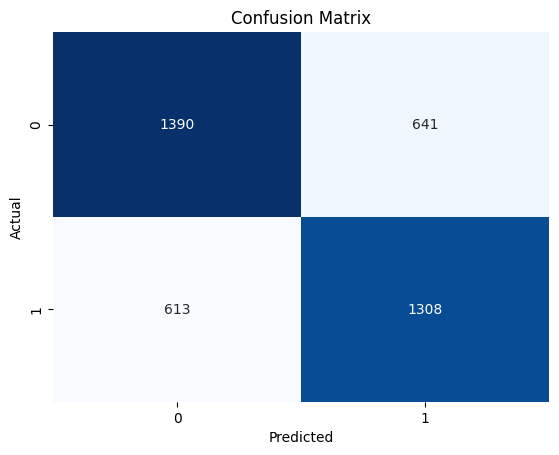

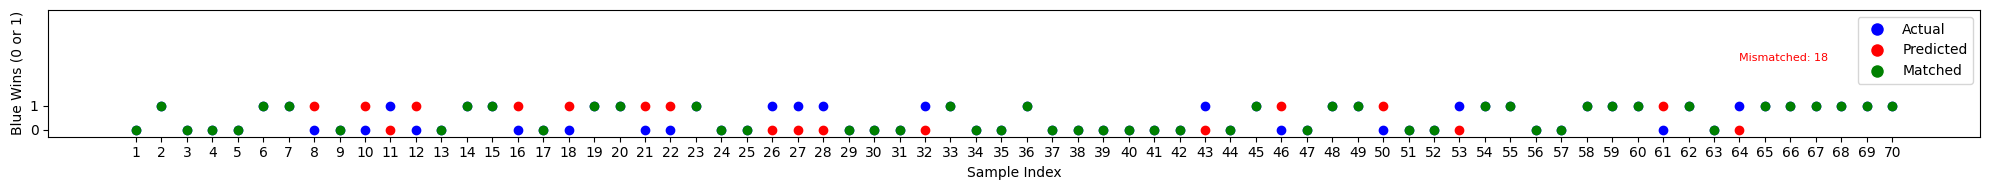

Accuracy score:
0.7181174089068826

Classification report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      2031
           1       0.71      0.71      0.71      1921

    accuracy                           0.72      3952
   macro avg       0.72      0.72      0.72      3952
weighted avg       0.72      0.72      0.72      3952


Confusion matrix:
[[1470  561]
 [ 553 1368]]


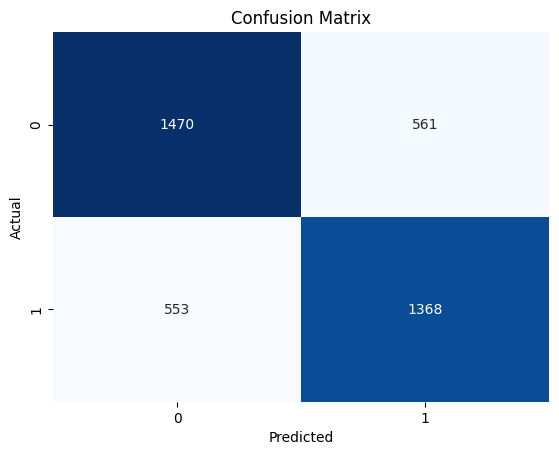

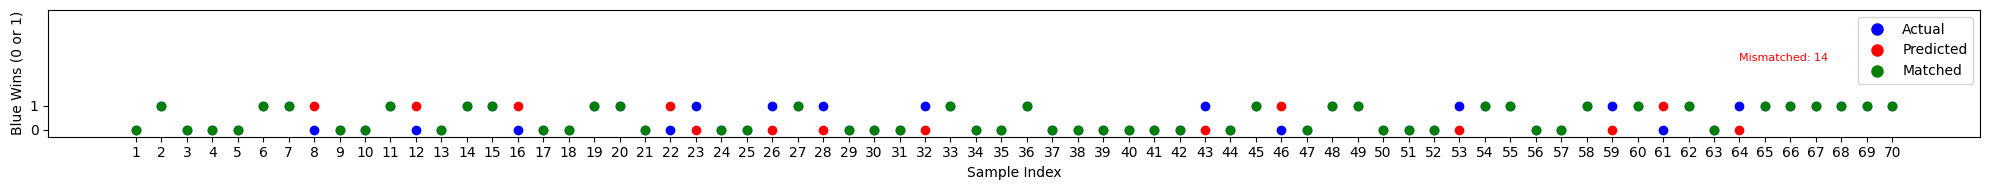

In [80]:
x=dataset.drop(["blueWins","gameId"], axis=1)
#x=dataset["blueGoldDiff"].values.reshape(-1, 1)
y = dataset["blueWins"].values.reshape(-1, 1).ravel()

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.4, random_state=0)

# Koristi K-Nearest Neighbors za klasifikaciju
knn_classifier = KNeighborsClassifier(3)
knn_classifier.fit(x_train, y_train.ravel())
y_pred = knn_classifier.predict(x_test)

acc_KNN_3=accuracy_score(y_test, y_pred)

print("Accuracy score:")
print(accuracy_score(y_test, y_pred))
print("")

print("Classification report:")
print(classification_report(y_test,y_pred))
print("")

print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


plt.figure(figsize=(20, 2))

# Number of samples to plot
num_samples = 70

# Plotting the actual outcomes
plt.scatter(range(1, num_samples + 1), y_test[:num_samples], color='blue', label='Actual')

# Count the number of mismatched samples
num_mismatched = sum(y_pred[i] != y_test[i] for i in range(num_samples))

# Plotting the predicted outcomes and adding text box for mismatched count
for i in range(num_samples):
    # Check if predicted and actual outcomes are the same
    if y_pred[i] == y_test[i]:
        k=0
        color = 'green'  # Use green if predicted and actual are the same
        label = 'Matched' if i == 0 else ''  # Show "Matched" only for the first matched point
    else:
        color = 'red'  # Use red if predicted and actual are different
        label = 'Predicted' if i == 0 else ''  # Show "Predicted" only for the first predicted point

    plt.scatter(i + 1, y_pred[i], color=color)

# Create a separate legend with labels for "Predicted" and "Matched"
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Actual'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Predicted'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Matched'),
]

# Add custom legend entries to the legend
plt.legend(handles=legend_elements)

# Add text box for mismatched count
plt.text(64, 3, f'Mismatched: {num_mismatched}', color='red', ha='left', va='center', fontsize=8)


plt.yticks([0, 1])
plt.ylim(-0.3, 5)

plt.xlabel('Sample Index')
plt.ylabel('Blue Wins (0 or 1)')
plt.xticks(range(1, num_samples + 1))  # Set ticks for the x-axis
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

x=dataset.drop(["blueWins","gameId"], axis=1)
#x=dataset["blueGoldDiff"].values.reshape(-1, 1)
y = dataset["blueWins"].values.reshape(-1, 1).ravel()

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.4, random_state=0)

# Koristi K-Nearest Neighbors za klasifikaciju
knn_classifier = KNeighborsClassifier(15)
knn_classifier.fit(x_train, y_train.ravel())
y_pred = knn_classifier.predict(x_test)

acc_KNN_15=accuracy_score(y_test, y_pred)

print("Accuracy score:")
print(accuracy_score(y_test, y_pred))
print("")

print("Classification report:")
print(classification_report(y_test,y_pred))
print("")

print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


plt.figure(figsize=(20, 2))

# Number of samples to plot
num_samples = 70

# Plotting the actual outcomes
plt.scatter(range(1, num_samples + 1), y_test[:num_samples], color='blue', label='Actual')

# Count the number of mismatched samples
num_mismatched = sum(y_pred[i] != y_test[i] for i in range(num_samples))

# Plotting the predicted outcomes and adding text box for mismatched count
for i in range(num_samples):
    # Check if predicted and actual outcomes are the same
    if y_pred[i] == y_test[i]:
        k=0
        color = 'green'  # Use green if predicted and actual are the same
        label = 'Matched' if i == 0 else ''  # Show "Matched" only for the first matched point
    else:
        color = 'red'  # Use red if predicted and actual are different
        label = 'Predicted' if i == 0 else ''  # Show "Predicted" only for the first predicted point

    plt.scatter(i + 1, y_pred[i], color=color)

# Create a separate legend with labels for "Predicted" and "Matched"
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Actual'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Predicted'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Matched'),
]

# Add custom legend entries to the legend
plt.legend(handles=legend_elements)

# Add text box for mismatched count
plt.text(64, 3, f'Mismatched: {num_mismatched}', color='red', ha='left', va='center', fontsize=8)


plt.yticks([0, 1])
plt.ylim(-0.3, 5)

plt.xlabel('Sample Index')
plt.ylabel('Blue Wins (0 or 1)')
plt.xticks(range(1, num_samples + 1))  # Set ticks for the x-axis
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Logistička regresija

Accuracy score:
0.7234311740890689

Classification report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      2031
           1       0.71      0.72      0.72      1921

    accuracy                           0.72      3952
   macro avg       0.72      0.72      0.72      3952
weighted avg       0.72      0.72      0.72      3952


Confusion matrix:
[[1473  558]
 [ 535 1386]]


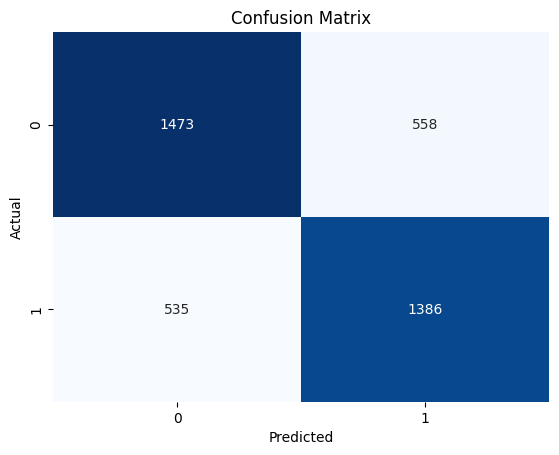

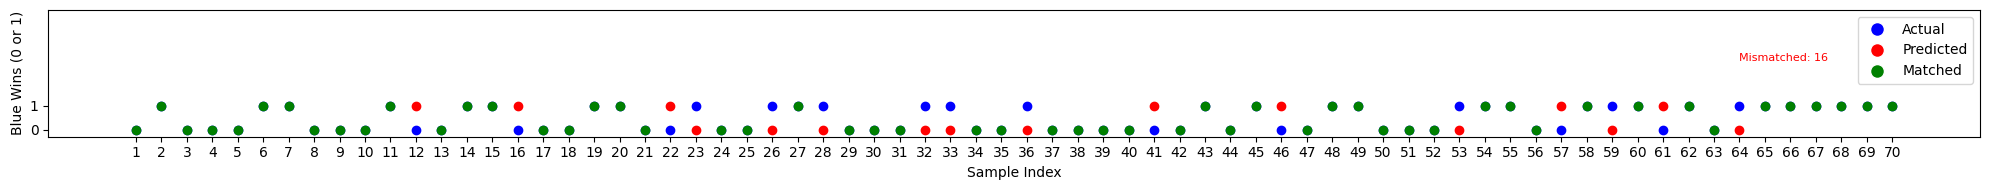

Accuracy score:
0.7310222672064778

Classification report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      2031
           1       0.72      0.73      0.73      1921

    accuracy                           0.73      3952
   macro avg       0.73      0.73      0.73      3952
weighted avg       0.73      0.73      0.73      3952


Confusion matrix:
[[1479  552]
 [ 511 1410]]


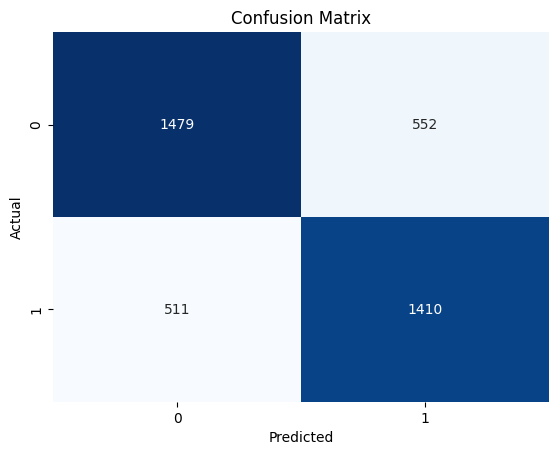

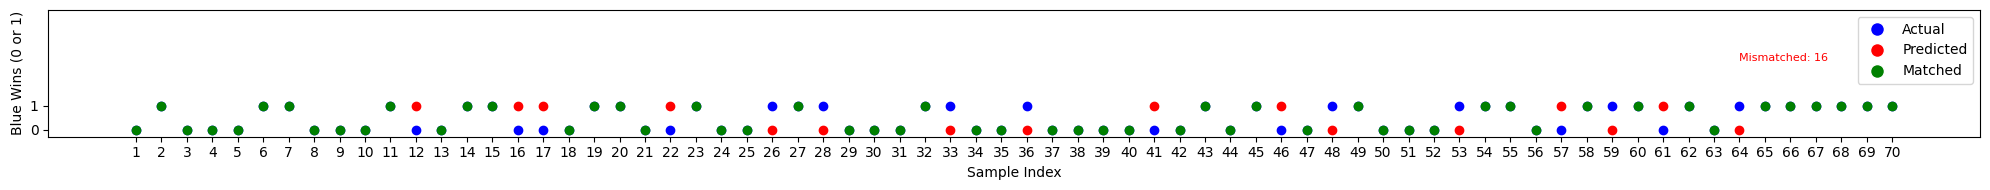

In [81]:
x=dataset.drop(["blueWins","gameId"], axis=1)
#x=dataset["blueGoldDiff"].values.reshape(-1, 1)
y = dataset["blueWins"].values.reshape(-1, 1).ravel()

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.4, random_state=0)

regressor=LogisticRegression(max_iter=1000)
regressor.fit(x_train,y_train.ravel())

y_pred= regressor.predict(x_test)

acc_LR_default = accuracy_score(y_test, y_pred)

print("Accuracy score:")
print(accuracy_score(y_test, y_pred))
print("")

print("Classification report:")
print(classification_report(y_test,y_pred))
print("")

print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


plt.figure(figsize=(20, 2))

# Number of samples to plot
num_samples = 70

# Plotting the actual outcomes
plt.scatter(range(1, num_samples + 1), y_test[:num_samples], color='blue', label='Actual')

# Count the number of mismatched samples
num_mismatched = sum(y_pred[i] != y_test[i] for i in range(num_samples))

# Plotting the predicted outcomes and adding text box for mismatched count
for i in range(num_samples):
    # Check if predicted and actual outcomes are the same
    if y_pred[i] == y_test[i]:
        k=0
        color = 'green'  # Use green if predicted and actual are the same
        label = 'Matched' if i == 0 else ''  # Show "Matched" only for the first matched point
    else:
        color = 'red'  # Use red if predicted and actual are different
        label = 'Predicted' if i == 0 else ''  # Show "Predicted" only for the first predicted point

    plt.scatter(i + 1, y_pred[i], color=color)

# Create a separate legend with labels for "Predicted" and "Matched"
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Actual'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Predicted'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Matched'),
]

# Add custom legend entries to the legend
plt.legend(handles=legend_elements)

# Add text box for mismatched count
plt.text(64, 3, f'Mismatched: {num_mismatched}', color='red', ha='left', va='center', fontsize=8)


plt.yticks([0, 1])
plt.ylim(-0.3, 5)

plt.xlabel('Sample Index')
plt.ylabel('Blue Wins (0 or 1)')
plt.xticks(range(1, num_samples + 1))  # Set ticks for the x-axis
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


dataset["killsDiff"]=dataset["blueKills"]-dataset["redKills"]
dataset["deathsDiff"]=dataset["blueDeaths"]-dataset["redDeaths"]
dataset["assistsDiff"]=dataset["blueAssists"]-dataset["redAssists"]
dataset["eliteMonstersDiff"]=dataset["blueEliteMonsters"]-dataset["redEliteMonsters"]
dataset["dragonsDiff"]=dataset["blueDragons"]-dataset["redDragons"]
dataset["heraldsDiff"]=dataset["blueHeralds"]-dataset["redHeralds"]
dataset["towersDestroyedDiff"]=dataset["blueTowersDestroyed"]-dataset["redTowersDestroyed"]
dataset["totalMinionsKilledDiff"]=dataset["blueTotalMinionsKilled"]-dataset["redTotalMinionsKilled"]
dataset["totalJungleMinionsKilledDiff"]=dataset["blueTotalJungleMinionsKilled"]-dataset["redTotalJungleMinionsKilled"]
dataset["wardsPlacedDiff"]=dataset["blueWardsPlaced"]-dataset["redWardsPlaced"]
dataset["wardsDestroyedDiff"]=dataset["blueWardsDestroyed"]-dataset["redWardsDestroyed"]
dataset["avgLevelDiff"]=dataset["blueAvgLevel"]-dataset["redAvgLevel"]
dataset["CSPerMinDiff"]=dataset["blueCSPerMin"]-dataset["redCSPerMin"]
dataset["goldPerMinDiff"]=dataset["blueGoldPerMin"]-dataset["redGoldPerMin"]
dataset["totalGoldDiff"]=dataset["blueTotalGold"]-dataset["redTotalGold"]
dataset["totalExperienceDiff"]=dataset["blueTotalExperience"]-dataset["redTotalExperience"]
dataset["firstBloodDiff"]=dataset["blueFirstBlood"]-dataset["redFirstBlood"]

x=dataset[["killsDiff","deathsDiff","assistsDiff","eliteMonstersDiff",
           "dragonsDiff","heraldsDiff","towersDestroyedDiff","totalMinionsKilledDiff",
           "totalJungleMinionsKilledDiff","wardsPlacedDiff","wardsDestroyedDiff",
           "avgLevelDiff","CSPerMinDiff","goldPerMinDiff",
           "totalGoldDiff","totalExperienceDiff","firstBloodDiff"]]
y = dataset["blueWins"].values.reshape(-1, 1).ravel()

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.4, random_state=0)

regressor=LogisticRegression(max_iter=1000)
regressor.fit(x_train,y_train.ravel())

y_pred= regressor.predict(x_test)

acc_LR_modified = accuracy_score(y_test, y_pred)

print("Accuracy score:")
print(accuracy_score(y_test, y_pred))
print("")

print("Classification report:")
print(classification_report(y_test,y_pred))
print("")

print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


plt.figure(figsize=(20, 2))

# Number of samples to plot
num_samples = 70

# Plotting the actual outcomes
plt.scatter(range(1, num_samples + 1), y_test[:num_samples], color='blue', label='Actual')

# Count the number of mismatched samples
num_mismatched = sum(y_pred[i] != y_test[i] for i in range(num_samples))

# Plotting the predicted outcomes and adding text box for mismatched count
for i in range(num_samples):
    # Check if predicted and actual outcomes are the same
    if y_pred[i] == y_test[i]:
        k=0
        color = 'green'  # Use green if predicted and actual are the same
        label = 'Matched' if i == 0 else ''  # Show "Matched" only for the first matched point
    else:
        color = 'red'  # Use red if predicted and actual are different
        label = 'Predicted' if i == 0 else ''  # Show "Predicted" only for the first predicted point

    plt.scatter(i + 1, y_pred[i], color=color)

# Create a separate legend with labels for "Predicted" and "Matched"
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Actual'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Predicted'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Matched'),
]

# Add custom legend entries to the legend
plt.legend(handles=legend_elements)

# Add text box for mismatched count
plt.text(64, 3, f'Mismatched: {num_mismatched}', color='red', ha='left', va='center', fontsize=8)


plt.yticks([0, 1])
plt.ylim(-0.3, 5)

plt.xlabel('Sample Index')
plt.ylabel('Blue Wins (0 or 1)')
plt.xticks(range(1, num_samples + 1))  # Set ticks for the x-axis
plt.tight_layout()  # Adjust layout for better spacing
plt.show()





### Usporedba rješenja

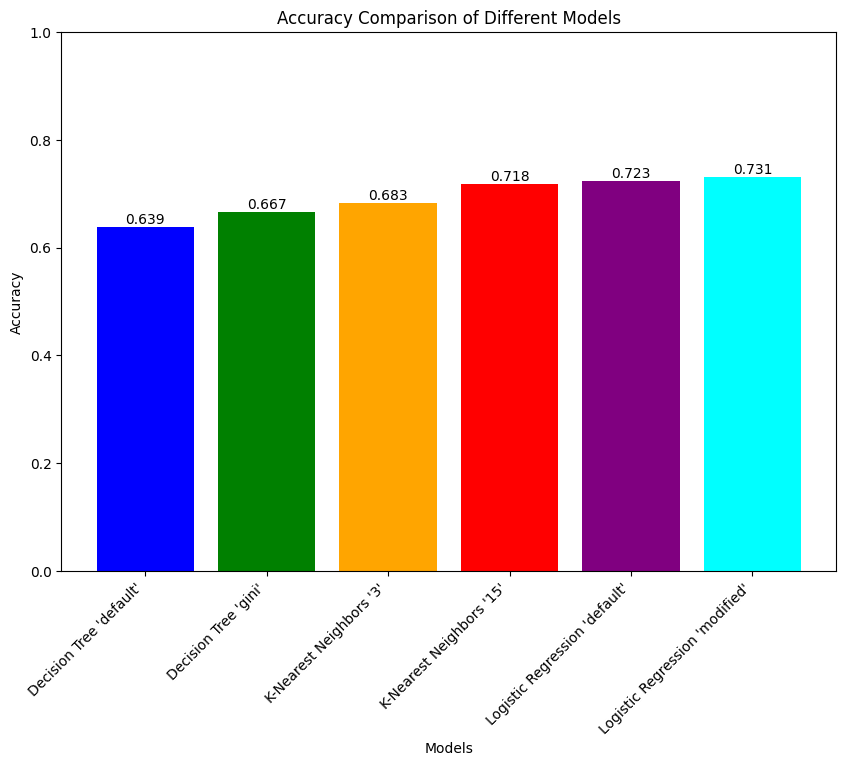

In [82]:

models = ["Decision Tree 'default'", "Decision Tree 'gini'", "K-Nearest Neighbors '3'", "K-Nearest Neighbors '15'", "Logistic Regression 'default'","Logistic Regression 'modified'"]
accuracy_values = [acc_DTC_default, acc_DTC_gini, acc_KNN_3, acc_KNN_15, acc_LR_default,acc_LR_modified]

plt.figure(figsize=(10, 7))
bars = plt.bar(models, accuracy_values, color=['blue', 'green', 'orange', 'red', 'purple','cyan'])
plt.ylim(0, 1)
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')

# Use plt.bar_label to add accuracy values directly to the bars
plt.bar_label(bars, fmt='%.3f', label_type='edge', fontsize=10)

plt.show()
